In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from random import *

In [2]:
d=pd.read_csv('Social_Network_Ads.csv')
df=pd.DataFrame(d)
df.drop(['User ID'],axis=1,inplace=True)
df['Gender']=np.where(df['Gender'] =='Male', 1, df['Gender'])
df['Gender']=np.where(df['Gender'] =='Female', 0, df['Gender'])
df['Gender']=pd.to_numeric(df['Gender'])
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [3]:
X=df["Age EstimatedSalary".split()]
Y=df["Purchased"]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [4]:
purchased_counts=[len(df[df['Purchased']==0]),len(df[df['Purchased']==1])]
print("Purchased[0, 1]:",purchased_counts)
print(f"no: {(purchased_counts[0]/sum(purchased_counts))*100}%")
print(f"yes: {(purchased_counts[1]/sum(purchased_counts))*100}%")

Purchased[0, 1]: [257, 143]
no: 64.25%
yes: 35.75%


In [5]:
df.groupby('Purchased').mean()

,Gender,Age,EstimatedSalary
Purchased,,,
0,0.505837,32.793774,60544.747082
1,0.461538,46.391608,86272.727273


In [6]:
df.groupby('Gender').mean()

,Age,EstimatedSalary,Purchased
Gender,,,
0,38.411765,71759.803922,0.377451
1,36.867347,67642.857143,0.336735


In [7]:
'''
age group 18-26 did not purchase at all
53-60 purchased 100%
'''
df.groupby('Age').mean()

,Gender,EstimatedSalary,Purchased
Age,,,
18,0.400000,66400.000000,0.000000
19,0.714286,46000.000000,0.000000
20,0.428571,61714.285714,0.000000
21,0.500000,61000.000000,0.000000
22,0.400000,48800.000000,0.000000
23,0.333333,51166.666667,0.000000
24,0.555556,49111.111111,0.000000
25,1.000000,65166.666667,0.000000
26,0.437500,53500.000000,0.000000


In [8]:
df.groupby('EstimatedSalary').mean()

,Gender,Age,Purchased
EstimatedSalary,,,
15000,0.500000,28.250000,0.0
16000,0.500000,23.500000,0.0
17000,0.333333,27.666667,0.0
18000,1.000000,29.250000,0.0
19000,1.000000,21.500000,0.0
...,...,...,...
146000,0.000000,44.000000,1.0
147000,0.000000,35.000000,1.0
148000,1.000000,29.000000,1.0


In [9]:
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import accuracy_score 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.5)
model = LogisticRegression()
model.fit(X_train, Y_train)
score=model.score(X, Y)
score

0.6425

In [10]:
accuracy_score(Y_test, model.predict(X_test))

0.65

In [11]:
from sklearn.metrics import *
cm = confusion_matrix(y_true=Y_test, y_pred=model.predict(X_test))
cm[::-1, ::-1]

array([[  0,  70],
       [  0, 130]])

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

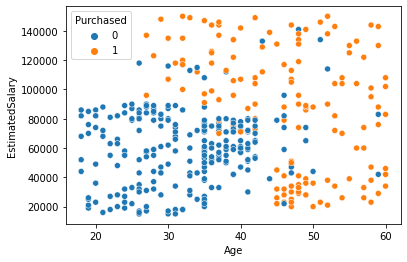

In [12]:
sb.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Purchased'])

/home/pict/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


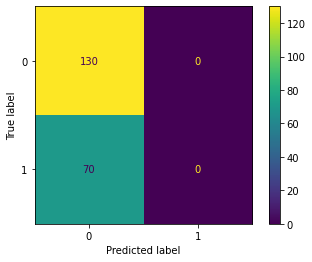

In [13]:
plot_confusion_matrix(model, X_test,Y_test)